In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import tqdm # progress bar
import re # regular expressions
import pickle as pkl # saving and loading pythonic data
import matplotlib.pyplot as plt # plotting

## Import custom libraries

In [2]:
import sys, os # system specific parameters and functions
sys.path.append(os.getcwd() + "/../") # add parent directory to path
from src.data_preprocessing import DataPreprocessing

## Load the data

In [3]:
dp = DataPreprocessing(df_path="../data/real_estate_ads_2022_10.csv", 
                       train_indices_path="../data/train_indices.npy", 
                       test_indices_path="../data/test_indices.npy")

In [4]:
dp.X.columns

Index(['market', 'created_at_first', 'updated_at', 'district_lon',
       'district_lat', 'title', 'description', 'params', 'no_rooms', 'm',
       'map_lon', 'map_lat'],
      dtype='object')

## Plot the data

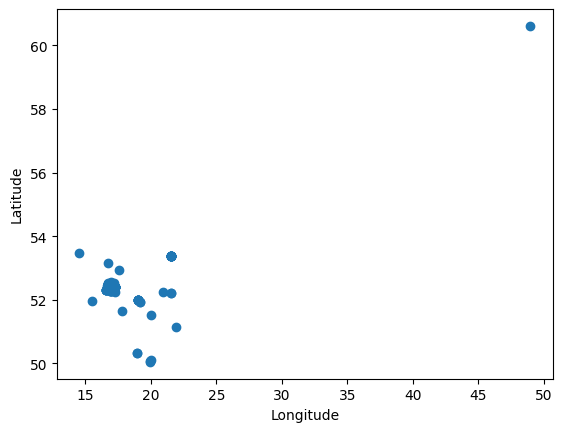

In [5]:
map_lon = dp.X["map_lon"]
map_lat = dp.X["map_lat"]

plt.scatter(map_lon, map_lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Let's "zoom in" 

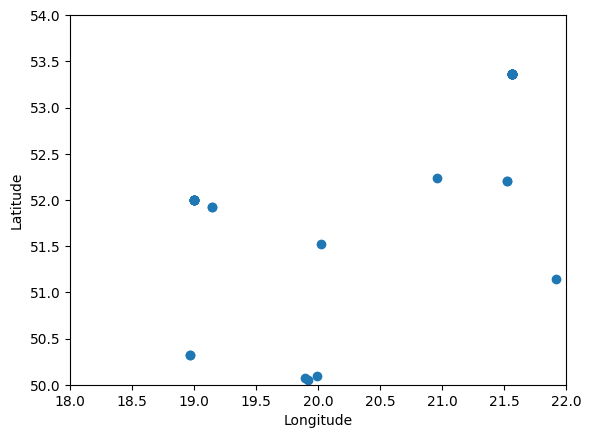

In [6]:
plt.scatter(map_lon, map_lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(18,22)
plt.ylim(50,54)
plt.show()

## Understand the data
The houses are quite probably in Poland (by reading the title and descriptions).

By using this as an heuristic, we can see that the values actually correspond with Decimal Degrees values.<br>
There are multiple APIs to use this data, such as a Geocoding API from Google.

However, for reasons of complexity / costs, I would not explore this.<br>
But it can be nice to extract something like postal code, and try to get features there, for example by comparing with some rent per capita data.

Regarding whether to transform this feature cyclically, I believe there's no need, since most values lie on Poland or neighbouring regions.

## Do nicer plot

### Install libraries

In [7]:
!pip install shapely geopandas geodatasets

In [8]:
!pip install plotly

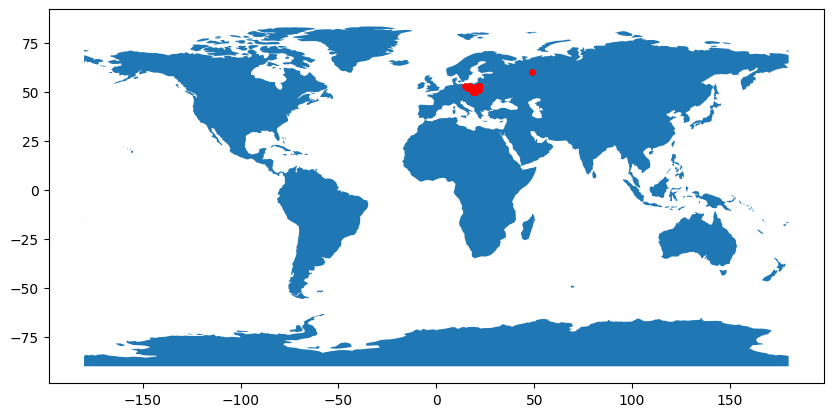

In [13]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

df = dp.X

geometry = [Point(xy) for xy in zip(df['map_lon'], df['map_lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

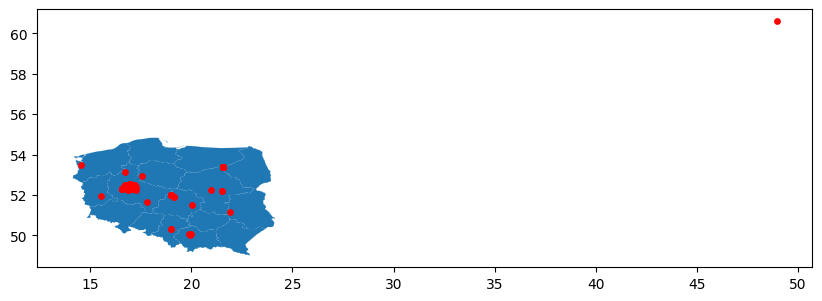

In [25]:
# imported from https://cartographyvectors.com/map/1502-poland-with-regions
world = gpd.read_file("../data/poland-with-regions_.geojson")
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

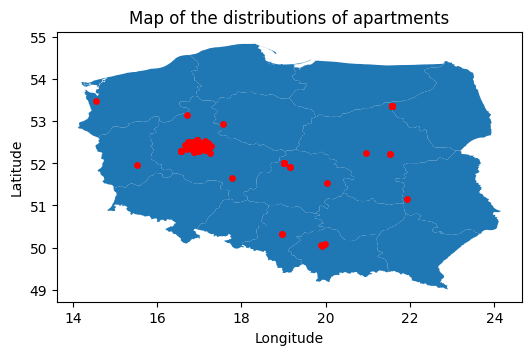

In [31]:
df = dp.X
df = df[df["map_lon"] < 25]

geometry = [Point(xy) for xy in zip(df['map_lon'], df['map_lat'])]
gdf = GeoDataFrame(df, geometry=geometry)  

# imported from https://cartographyvectors.com/map/1502-poland-with-regions
world = gpd.read_file("../data/poland-with-regions_.geojson")
fig = gdf.plot(ax=world.plot(figsize=(6, 6)), marker='o', color='red', markersize=15);
fig.set_title("Map of the distributions of apartments")
fig.set_xlabel("Longitude")
fig.set_ylabel("Latitude")
plt.show()


We can see that the region with more points is Wielkopolska.

We could also use mapbox, which is great (and interactive), but requires a token key (and may imply a cost depending on use)

By observing the distribution, we can guess that standardizing this data (if required by the model) should suffice.